# Variabile aleatoare continue 

O variabilă aleatoare continuă este o funcție $X:\Omega \to I$, unde $I$ este un interval din $\mathbb{R}$. Putem să ne gîndim
la o variabilă aleatoare continuă ca provenind dintr-una discretă, dar cu valorile cutiilor din ce în ce mai mici.

Ca și în cazul variabilelor discrete putem asocia unei variabile aleatoare continue o densitate de probabilitate, adică o 
funcție $f(x)$ pentru care 
$$
P(a \leq X \leq b)=\int_a^b f(x) dx.
$$

Analog cu cazul discret $f(x) \geq 0$ și
$$
\int_{-\infty}^{\infty} f(x) dx = 1.
$$
Adică aria de sub graficul lui $f$ este egală cu $1$. De asemenea se poate defini și densitatea cumulativă de probabilitate
prin
$$
F(x)=P(X\leq x).
$$

Avem noțiunile analoage de medie și varianță pentru variabile aleatoare continue. 
$$
E[X]=\int_{-\infty}^{\infty}xf(x) dx.
$$
Ca și înainte media mai este numită și valoare așteptată.

Varianța are formula
$$
Var[X]=\int_{-\infty}^{\infty}(x-E[X])^2f(x)dx
$$
sau dacă efectuăm calculele
$$
Var[X]=\int_{-\infty}^{\infty}x^2f(x)dx-E[X]^2.
$$

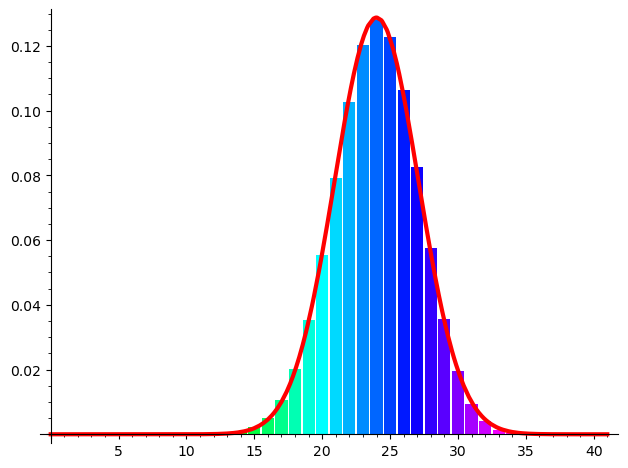

In [12]:
from scipy.stats import binom
n=40
p=0.6
binom_dist=binom(n,p)

m=n*p
s=sqrt(n*p*(1-p))
f(x)=1/(s*sqrt(2*pi))*exp(-1/2*((x-m)/s)^2)
p1=bar_chart([binom_dist.pmf(x) for x in range(n+1)],width=0.9,rgbcolor=[hue(x/n) for x in range(n+1)])
p2=plot(f,(x,0,n+1),color='red',thickness=3)
(p1+p2).show()

## Exemple

Multe fenomene au probabilitatea descendentă exponențial. O variabilă aleatoare $T$ cu parametru $c$ ia valori în $[0,\infty)$
și are densitatea de probabilitate $f(x)=ce^{-cx}.$ Media lui $T$ este $\frac{1}{c}$.

Alte fenomene sînt modelate de variabile aleatoare normale. O variabilă aleatoare normală are distribuția
$$
f(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}.
$$
Media unei astfel de variabile este $\mu$, iar varianța este $\sigma^2$.

Adesea este util să considerăm variabile normale cu media $0$ și varianța $1$.

# Inferență statistică

Inferența statistică se referă la găsirea unor proprietăți ale unei populații pornind de la un eșantion al acesteia. De obicei
nu cunoaștem distribuția unei variabile aleatoare și încercăm folosind un eșantion să determinăm această distribuție. Ca să
mai ușurăm căutarea concentrîndu-ne pe variabile normal distribuite.

Presupunem că rezultatele testelor IQ sînt normal distribuite. Dorim să aflăm media și varianța pentru această distribuție. Luăm
cîteva rezultate la întîmplare și obținem $\left\{85,109,93,101,115\right\}.$ Putem considera acestea ca rezultatele a 5 
variabile aleatoare cu aceeași densitate de probabilitate $f(x)$. Deci media valorilor poate fi interpretată ca media valorilor
valorilor aleatoare. Pentru aceasta este nevoie să investigăm sumele și mediilor variabilelor aleatoare.

Două variabile aleatoare se numesc independente dacă 
$$
P(X_1 \leq a_1 \cap X_2 \leq a_2)=P(X_1\leq a_1)P(X_2 \leq a_2)
$$
pentru orice valori $a_1$ și $a_2$.

O mulțime $\left\{X_1,\dots,X_n\right\}$ de variabile aleatoare se numește independente identic distribuite dacă sînt independente și au toate aceeași distribuție.

Presupunem că variabilele $\left\{X_1,\dots,X_n\right\}$ sînt i.i.d, normale cu media $\mu$ și variația $\sigma$. Fie
$$
Y=\frac{X_1+\dots+X_n}{n}.
$$
Atunci media lui $Y$ este $\mu,$ iar deviația standard este $\frac{\sigma}{\sqrt{n}}$.

Presupunem că cele 5 valori ale IQ sînt obținute dintr-o populație pentru care rezultatele sînt modelate de o variabilă 
aleatoare cu $\mu=110$ și $\sigma=12.$ Atunci variabila medie $Y$ a eșantionului are media $110$ și deviația standard 
$\frac{12}{\sqrt{5}} \approx 5.37.$ 

Distribuția lui $Y$ obținut în felul acesta se numește **distribuția eșantionului**. Dorim să estimăm media populației dintr-un
eșantion. Vrem să vedem cum deviază rezultatele față de medie. 

Revenind la exemplul cu testul de IQ. Nu cunoaștem media, dar știm că deviația standard este $15$. Care este probabilitatea ca media de selecție să devieze cu cel mult 10 puncte față de $\mu$?

Știm că variabila medie are media $\mu$ și deviația standard $\frac{15}{\sqrt{5}}\approx 6.71$. Probabilitatea căutată este
$$
\int_{\mu-10}^{\mu+10}\frac{1}{6.71\sqrt{2\pi}}e^\frac{-(y-\mu)^2}{2(6.71)^2}dy.
$$

Facem substituția $u=\frac{y-\mu}{6.71\sqrt{2}}$ și integrala devine
$$
\frac{1}{\pi}\int^\frac{10}{6.71\sqrt{2}}_{-\frac{10}{6.71\sqrt{2}}}e^{-u^2}du.
$$
Primitiva nu poate fi exprimată prin funcții elementare, dar putem calcula cu calculatorul și obținem aproximativ $0.86$.

Se vede că pentru a calcula deviația față de medie nu trebuie să cunoaștem valoarea lui $\mu$.

In [10]:
u=var('u')
f(u)=exp(-u^2)
numerical_approx(integrate(f(u),(u,-10/(6.71*sqrt(2)),10/(6.71*sqrt(2))))/sqrt(pi))

0.863858035105805

## Intervale de încredere

Încercăm în continuare să estimăm media $\mu$. Pentru a găsi o aproximare a acesteia vom găsi intervale în care vom ști destul 
de sigur că se află media. 

O variabilă normală standard $Z$ are PDF 
$$
f(z)=\frac{1}{\sqrt{2\pi}}e^{-\frac{z^2}{2}}.
$$

Orice altă variabilă aleatoare normală $X$ poate fi adusă la forma standard prin
$$
Z=\frac{X-\mu}{\sigma}.
$$
Avem
  1. Aproximativ 90% din aria curbei este între -1,64 și 1,64;
  2. Aproximativ 95% din aria curbei este între -1,96 și 1,96;
  3. Aproximativ 99% din aria curbei este între -2,58 și 2,58.
  
Ideea de interval de încredere este următoarea: să se găsească un interval care cu o anumită probabilitate să conțină media 
reală. Dacă $Y_n$ este variabila medie, definim noua variabilă 
$$
Z_n=\frac{Y_n-\mu}{\sigma/\sqrt{n}}.
$$

Aceasta este o variabilă aleatoare normală standard. Știm că $P(-1,96 < Z < 1,96) =0,95$. Înlocuim cu valoarea lui $Z_n$, 
obținem 
$$
P\left(Y_n-1.96\frac{\sigma}{\sqrt{n}} < \mu < Y_n+1.96\frac{\sigma}{\sqrt{n}}\right)=0.95.
$$

Intervalul $\left(Y_n-1.96\frac{\sigma}{\sqrt{n}},Y_n+1.96\frac{\sigma}{\sqrt{n}}\right)$ este intervalul de încredere 95%.

Pentru exemplul testelor IQ. Media eșantioanelor este $Y_n=100.6$, am presupus $\sigma=15.$ Intervalul de încredere 95% este
$\left(100.6-\frac{15}{\sqrt{5}},100.6+\frac{15}{\sqrt{5}}\right),$ adică $(87.5,113.7).$

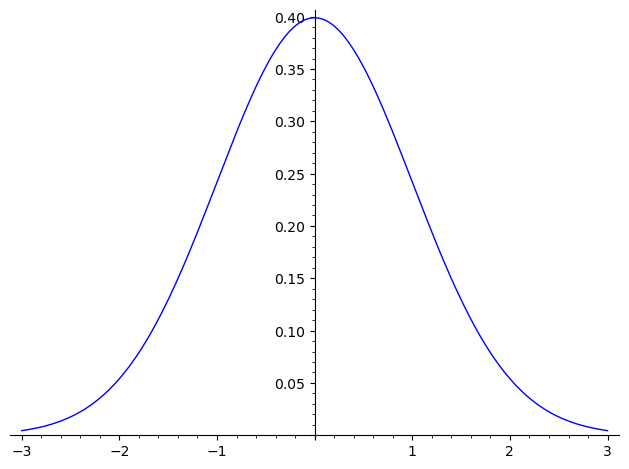

In [2]:
z=var('z')
f(z)=1/sqrt(2*pi)*exp(-z^2/2)
plot(f,(z,-3,3))

# t-Distribuția lui Student

În situațiile reale nu cunoaștem deviația standard. Pentru un eșantion $\left\{x_1,\dots,x_n\right\}$ cu media valorilor 
$\overline{x}$ deviația standard a eșantionului este 
$$
s=\sqrt{\frac{1}{n-1}\sum_{k=1}^n\left(x_k-\overline{x}\right)^2}.
$$

Vom substitui aceast număr pentru deviația standard pe care nu o cunoaștem. Vom defini o nouă variabilă aleatoare 
$$
T_{n-1}=\frac{Y_n -\mu}{s/\sqrt{n}}.
$$

$T_{n-1}$ nu este o variabilă normală, dar putem calcula distribuția sa. Dacă $Y_n este o variabilă normală, atunci
distribuția lui $T_{n-1}$ se numește t-distribuția lui Student. Distribuția depinde de un parametru numit gradul de libertate
(df).

Există o valoare $t_{95}$ pentru care graficul distribuției acoperă 95%, adică
$$
P(-t_{95} < T_{n-1} < t_{95}) =0.95.
$$

Înlocuind și efectuînd calculele obținem că 
$$
P\left(Y_n-t_{95}\frac{s}{\sqrt{n}} < \mu < Y_n+t_{95}\frac{s}{\sqrt{n}}\right)=0.95.
$$

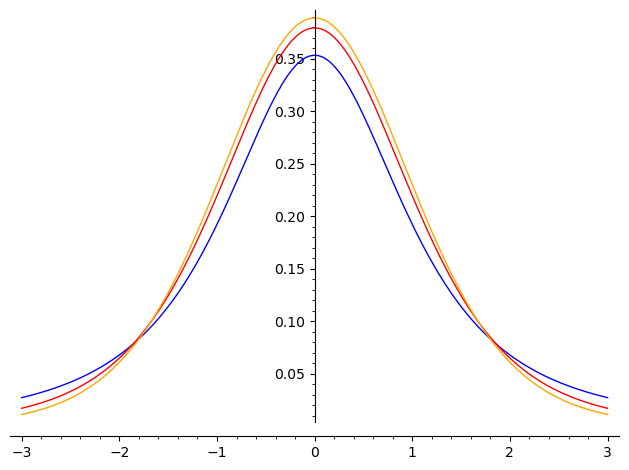

In [17]:
x=var('x')
from scipy.stats import t
df=2
g=t(df)
def f4(x):
    return g.pdf(x)
p1=plot(f4,(x,-3,3))
df=5
g=t(df)
def f5(x):
    return g.pdf(x)
p2=plot(f5,(x,-3,3),color='red')
df=10
g=t(df)
def f10(x):
    return g.pdf(x)
p3=plot(f10,(x,-3,3),color='orange')
(p1+p2+p3).show()

# Testarea ipotezelor

Testarea ipotezelor se referă la estimarea unui parametru cu o anumită probabilitate. Presupunem că 14 subiecți au primit EPO. 
Capacitatea lor pulmonară a crescut cu valorile din listă $\left\{0.4,0.5,0.3,0.4,0.5,0.3,0.3,0.4,0.5,0.3,0.3,0.2,0.3,0.1\right\}.$ Ne întrebăm dacă media distrbuției egală cu $0$ sau nu? Avem două ipoteze: **ipoteza nulă** - media este $0$ și 
**ipoteza alternativă** - $\mu \neq 0$. 

Pentru verificare, presupunem că ipoteza nulă este adevărată. Prin urmare ne întrebăm care este probabilitatea să obținem datele
în ipoteza nulă. Dacă probabilitatea este mică atunci ipoteza nulă nu este plauzibilă și ipoteza alternativă este plauzibilă. 

Presupunem că datele urmează o distrbuție normală. Notăm cu $T_{13}=\frac{Y_{14}-0}{s/\sqrt{14}}$ pentru 14 valori Aceasta se numește $t-$statistică. Dacă ipoteza nulă este adevărată atunci valoarea lui $T_{13}$ este foarte mică. Dacă însă valorile
sînt mari atunci ipoteza nulă este falsă. 

Matematic putem spune că ipoteza nulă este adevărată dacă t-statistica are distribuția t a lui Student. În cazul nostru media
$Y_{15} \approx 0.342$ și deviația standard $s\approx 0.112$. T-statistica este $T_{13} \approx 11.5$ Valoarea este foarte 
departe de centru deci ipoteza nulă este ne plauzibilă.

Măsura plauzabilității este **P-valoarea**. Pentru $T_{n-1}=t^*$ este aria de sub graficul distribuției lui Student înafara
intervalului $(-t^*,t^*)$. Dacă valoarea lui $P$ este aproape de 1, atunci ipoteza nulă este validă. Dacă valoarea este foarte
mică, atunci respingem ipoteza nulă. $P-$valoarea sub care repsingem ipoteza nulă se numește **prag de încredere**. De obicei
pragul de încredere va fi $0.05$.

In [9]:
import numpy as np
sample=[0.4,0.5,0.3,0.4,0.5,0.3,0.3,0.4,0.5,0.3,0.3,0.2,0.3,0.1]
med=np.mean(sample)
dev=np.std(sample)
print(np.mean(sample))
print(np.std(sample))
T13=numerical_approx(med/(dev/sqrt(14)))
print(T13)

0.34285714285714286
0.11157499537009506
11.4976833019298


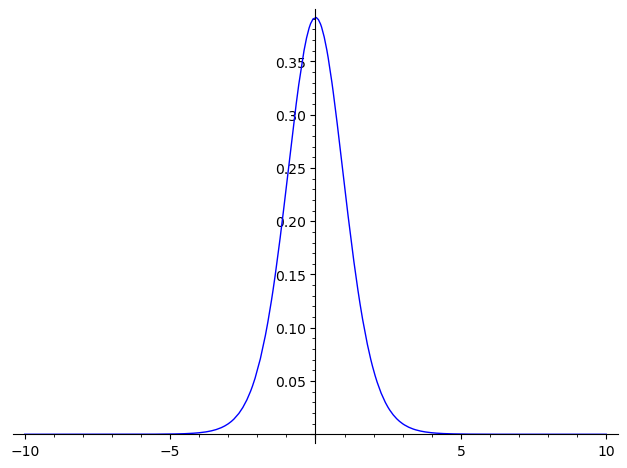

In [11]:
from scipy.stats import t
df=13
g=t(df)
def f4(x):
    return g.pdf(x)
plot(f4,(x,-10,10))